### development notebook

In [1]:
import sys
import os
import itertools
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt

from utils import *

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


### PWM task


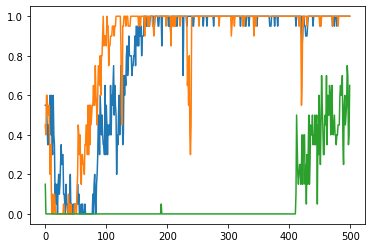

In [2]:
## delay length experiment
neps = 10000

for d in [1,2,3]:
  task = PWMTask(stim_set=[(0,1),(1,0)])
  actor = ActorCritic()
  env = Env(actor,task)
  
  holdR = np.zeros(neps)
  actR = np.zeros(neps)
  for ep in range(neps):
    data = env.run_pwm_trial(delay=d,update=True)
    holdR[ep]=data['reward'][:-1].mean()
    actR[ep]=data['reward'][-1]
  plt.plot(actR.reshape(-1,20).mean(1))